In [2]:
# X Naive Bayes (in-depth)

# Naive Bayes umfasst eine Gruppe von sehr schnellen und einfachen Klassifizierungsalgorithmen
# >> werden daher oft als Baseline Modelle für Klassifizierung verwendet

# X Bayesian Classification
# ... Bayesian Methods beauen auf dem Bayes Theorem auf, das die Beziehung von bedingten Wahrscheinlichkeiten zu statistischen
#     Häufigkeiten beschreibt
# ... Dabei interessiert uns, die Wahrscheinlichkeit eines Labels, wenn einige Features bekannt sind P(L|features)
# ... ab da wirds komplizierter. Bayes Theorem P(L|features) = (P(features|L)*P(L))/P(features)
# ... es wird ein Modell benötigt, das P(features|L) für jedes Label bestimmen kann, dieses wird generative Model genannt, da 
#     es den Zufallsprozess der Datengenerierung festlegt (= Großteil des "Trainings") >> Der Schritt wird durch Annahmen vereinfacht

# X Naive Bayesian Classification
# ... trifft etwas vereinfachte Annahmen, erlaubt eine ungefähre Schätzung der Klassen und vereinfachen die Klassifizierung

# >> Um die Wahrscheinlichkeit zweier Label für einen Datenpunkt unter gegebenen features miteinander zu vergleichen,
#    werden diese in Relation gesetzt P(L1|features)/P(L2|features)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.94, 0.06],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ]])

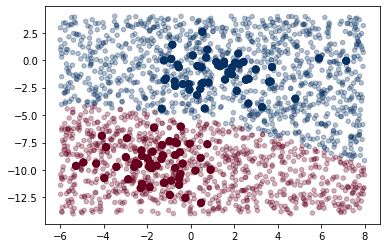

In [90]:
# X 1 Gaussian Naive Bayes
# Die vereinfachte Annahme ist, dass die Daten von jedem Label auf einer einfachen Gaussischen Verteilung (Normalverteilung) 
# basieren
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Beispiel Verteilung
from sklearn.datasets import make_blobs

# Generiert Daten mit zwei unterschiedlichen Mittelpunkten
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')


# - Die einfachste Form der Klassifizierung nimmt dabei an, dass die Daten von einer Normalverteilung ohne Kovariate
#   beschrieben werden können >> Dafür werden nur der Mittelwert und die Standardabweichung für jedes Label benötigt
# > Damit kann eine Wahrscheinlichkeitsverteilung für die Labelzugehörigkeit bestimmt werden (je näher am Zentrum, desto 
#   wahrscheinlicher die Zugehörigkeit) > Damit kann der postirior ratio für jeden Punkt bestimmt werden

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

# model.theta_

# Neue Daten generieren
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c=ynew, s=20, cmap="RdBu", alpha=0.3)

# es ist möglich sich die Wahrscheinlichkeiten der Labelzuordnung ausgeben zu lassen
yprob = model.predict_proba(Xnew)
yprob[1:20,].round(2)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


X Example Data
From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communication

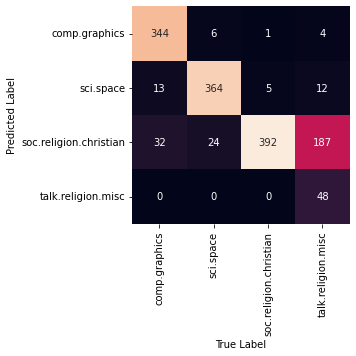

In [91]:
# X Multinomial Naive Bayes
# ein weiteres einfaches Modell basiert auf der Annahme, dass die Daten aus einer einfachen multinomialen Verteilung stammen
# (Multinomiale Verteilungen beschreiben die Wahrscheinlichkeit einer Kategorie auf Basis ihrer Häufigkeit)

# > Dieses Modell wird oft bei Text-Klassifizierung verwendet, bei der die features Worthäufigkeiten darstellen

# Beispiel: Textklassifizierung
import sklearn
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
print(data.target_names) # spezifizierte Kategorien

# Textkategorien werden zur Vereinfachung etwas runtergebrochen
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

print('\n\nX Example Data')
print(train.data[5])

# Um die Daten für Machinenlernen zu verwenden, muss jeder String in einen Vektor von Wordcounts umgewandelt werden
# Dafür wird hier der TF-IDF Vectorizer verwendet

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# a) Weg im Buch
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)
labels = model.predict(test.data)

# Weitere Aufschlüsselung
print(labels[20:30])

# Verteilung der Label
from collections import Counter
freq = Counter(labels)
print(freq)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)

# Darstellung in einer Heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

# >> Die Darstellung zeigt, dass in dieser einfachen Klassifizierung, Gespräche über Space recht leicht von GEsprächen über
#    Computer getrennt werden können >> Schwierig wirds bei Religion und Christentum


# b) Aufschlüsselversuch
print('\n\nX Eigene Lösung')
td_idf = TfidfVectorizer()
# tf-idf wird auf basis des Trainingsdatensatzes erstellt + Daten werden in eine tf-idf transformiert
X_train= td_idf.fit_transform(train.data)
# print(X_train) gibt die tf_idf aus

# MultinomialNB() nimmt eigentlich eine frequency Matrix von Wordcounts... tf-idf funktioniert aber auch 
model1 = MultinomialNB()
model1.fit(X_train, train.target)

# die Testdaten müssen zunächst in eine tf-idf transformiert werden, die jedoch die gleichen features wie der Trainingsdatensatz
# enthalten muss! daher wird nur transform() und nicht fit_transform verwendet
X_test = td_idf.transform(test.data)
labels2 = model1.predict(X_test)

print(labels2[20:30]) # die vorhersage ist die Gleiche


# Damit kann auch nun auch von jedem anderen Text eine vorhersage gemacht werden
def predict_category(self, train=train, model=model):
    pred = model.predict([self]) # Gibt Kategorie
    return train.target_names[pred[0]] # Wählt Ausprägung aus

print("\n\nX Scentence Predictions")
print(predict_category('sending a payload to the ISS'))
print(predict_category('discussing islam vs atheism'))
print(predict_category('determining screen resolution'))


In [ ]:
# Wann sollte Naive Bayes angewandt werden?
# ... diese Modelle  treffen vereinfachte Annahmen und sind daher oft nicht so gut geeignet, wie komplexere Trainignsmodelle

# Vorteile:
# - schnell in Training und Vorhersage
# - Einfach zu interpretierende probabilistische Vorhersagen
# - Wenige Parameter
# >> Daher werden sie oft als Baseline-Modelle verwendet-
# >> Wenn diese bereits gut performen, kann das MOdell beibehalten werden, wenn nicht sollte auf komplexere Verfahren umgest. werden

# Situation, in denen das Modell besonders gut geeignet ist:
# - wenn die naiven Annahmen tatsächlich der Datenlage entsprechen (sehr selten der Fall in Praxis)
# - wenn die Kategorien trennscharf voneinander zu unterscheiden sind (wenig Überschneidung) > komplexes Modell nicht notwendig
# - Für hoch-dimensionale Daten, wo Modell-Komplexität eine geringere Rolle spielt
# >> die letzten beiden Punkte sind verbunden, da Cluster in Datensätzen mit höherer Dimensionalität im Durchschnitt weiter
#    voneinander entfernt sind und daher mit einfacheren Algorithmen besser bestimmt werden können
